In [21]:
#datasets : 예제 데이터가 들어있는 모듈
from sklearn.datasets import load_iris

In [22]:
iris_data=load_iris()
type(iris_data)

sklearn.utils.Bunch

### **"Bunch"**
`dict`와 매우 비슷한 구조. <br>
key에 대한 접근을 `' . '` 을 통해서 가능.
- dict 쓰듯이 ["__"]해도 가능

In [23]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
# '.'을 통한 key에 대한 접근 
iris_data.data[3]

array([4.6, 3.1, 1.5, 0.2])

In [25]:
#shape 확인
#행 :150 개의 데이터
#열 : 4 개의 항목(feature)
iris_data.data.shape


(150, 4)

In [26]:
# target(분류에서는 'Label')모델의 예측값.
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
iris_data.target.shape

(150,)

1. `iris_data['data']`의 개수와 동일하게 150개의 타겟 (정상 데이터)
3. 클래스는 총 세 개가 있을 것이다.

In [28]:
# target_names
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
# feature_names 
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
import pandas as pd

iris_df = pd.DataFrame(data=iris_data.data,columns=iris_data.feature_names)

In [33]:
iris_df['Target']=iris_data.target

In [34]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 머신러닝 모델링 프로세스 
1. 데이터 세트 분리
2. 모델학습
3. 예측 수행
4. 평가

# 실제 모델링 프로세스를 실습해보자.

In [35]:
# 0. 수집
iris = load_iris()
iris_feature = iris.data
iris_target = iris.target

In [40]:
# shape 습관 : feature와 target의 수가 일치하는지 확인
iris_target.shape,iris_feature.shape

((150,), (150, 4))

In [41]:
import pandas as pd

feature_names = iris.feature_names

iris_df = pd.DataFrame(
    data=iris_feature,
    columns=feature_names
)

iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
# "분류" 문제에서 확인할 제일 중요한 내용 : 타깃의 개수 (50:50:50과 같은 균형 데이터인가?)
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# 1. 학습데이터/ 테스트데이터 분리

In [44]:
from sklearn.model_selection import train_test_split
#훈련데이터, 
X_train,X_test, y_train, y_test = train_test_split(
    # .drop(삭제, 속성 하나를 지우는거니까 1->0방향, axis=1)
    iris_df.drop("target", axis=1), #target이 drop된 Feature "X"
    iris_df['target'], #y에 들어갈 target
    test_size=0.2, # 테스트 검증 세트의 비율. (보통 0.2~0.3 /전체 비율 중에 테스트를 2~30%, 훈련을 약 70%)
    random_state=42 # 랜덤 시드 고정값.
    # 시드가 고정(random_state=?)되면 동일한 무작위값이 나온다.
)

In [47]:
X_train.shape,X_test.shape

((120, 4), (30, 4))

# 모델 훈련

In [46]:
#Estimater
#의사결정 나무 분류기 사용
from sklearn.tree import DecisionTreeClassifier

#모델 객체 생성
dt_clf=DecisionTreeClassifier()

#모델 훈련
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

## 3. 테스트 데이터 예측

In [48]:
pred = dt_clf.predict(X_test)

pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## 평가
예측 정확도(Accuracy)평가


In [49]:
from sklearn.metrics import accuracy_score

acc_result= accuracy_score(y_test,pred)
acc_result

# y_test(실제)와,pred(예측)을 비교

1.0

# Model_selection의 train_test_split 알아보기

In [50]:
iris = load_iris()
X = iris.data
y = iris.target

In [51]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

이번에는 랜덤성을 부여하지 않고(split, shuffle없이) 잘라보자  

In [54]:
test_size=50

X_test = X[: test_size]
y_test = y[: test_size]

y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [55]:
X_train = X[test_size: ]
y_train = y[test_size: ]

y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
accuracy_score
pred = dt_clf.predict(X_test)
acc_result = accuracy_score(y_test, pred)
acc_result


0.0

In [59]:
y_test,pred

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]))

In [60]:
X_train,X_test,y_train,y_test = train_test_split(
    
    X,y, test_size=0.3, random_state=121
)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

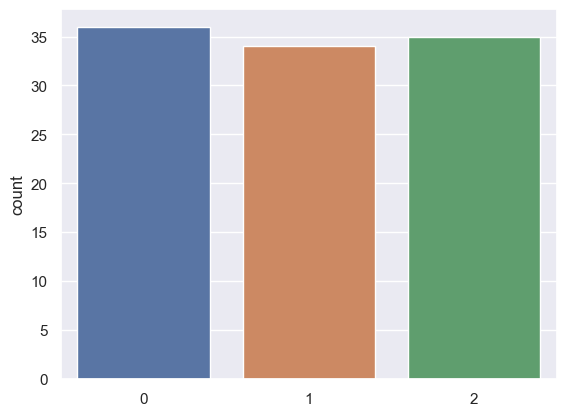

In [63]:
sns.countplot(x=y_train)
plt.show()

## stratify 옵션 활용하기
- 데이터 분할 시 원본 데이터의 비율과 동일하게 테스트
세트를 생성하기 위해 지정하는 데이터 기준

In [65]:
X_train,X_test,y_train,y_test = train_test_split(   
    X,y, test_size=0.3, random_state=121,
    #stratify
    stratify=y
)

# y의 비율에 맞게 

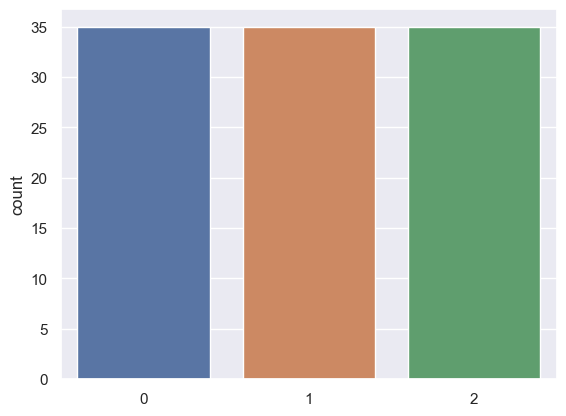

In [66]:
sns.countplot(x=y_train)
plt.show()

K-Fold, Stratified K-Fold

In [67]:
from sklearn.model_selection import KFold
import numpy as np

In [70]:
# 이번에도 분류문제를 위한 아이리스 데이터를 사용
kfold = KFold(n_splits=3) 

#split() - 
for train_indices, valid_indices in kfold.split(X):
    print(f'검증 인덱스 {valid_indices}')
    print(f'훈련 인덱스 {train_indices}')
    print()

검증 인덱스 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
훈련 인덱스 [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]

검증 인덱스 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
훈련 인덱스 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 

## 교차검증 수행
### 각 폴드 마다 훈련 세트를 위한 인덱스를 활용해 훈련 데이터로 사용
### 검증 세트를 위한 인덱스를 활용해 검증 데이터로 사용
### 각 훈련, 검증의 결과를 저장했다가, 최종으로 훈련이 끝나고 평균을 비교.


In [71]:
type(X)

numpy.ndarray

In [80]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열
kfold = KFold(n_splits=3) 
for train_indices, valid_indices in kfold.split(X):

  X_train,X_valid= X[train_indices], X[valid_indices]
  y_train,y_valid= y[train_indices], y[valid_indices]


  # 모델 생성 및 훈련

  dt_clf= DecisionTreeClassifier().fit(X_train, y_train) 
  #모델 객체 생성과                #동시에 훈련.
  
  # 예측
  pred = dt_clf.predict(X_valid)


  # 평가
  acc_result = accuracy_score(y_valid, pred)

  cv_accuracy.append(acc_result)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc_result))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.0000
2 번째 폴드에 대한 평가 결과 : 0.0000
3 번째 폴드에 대한 평가 결과 : 0.0000

최종 결과 : 0.0


In [84]:
#Stratified K Fold
from sklearn.model_selection import StratifiedKFold
skfold= StratifiedKFold(n_splits=3)

# fold의 splits=3인데 
for train_indices, valid_indices in skfold.split(X, y):
  print(f"검증 세트의 인덱스 : {valid_indices}")
  print()

  class_, counts = np.unique(y[valid_indices], return_counts=True)
  classes = dict(zip(class_, counts))
  print(f"클래스 0 : {classes[0]}개 / 클래스 1 : {classes[1]}개 / 클래스 2 : {classes[2]}개".format())
  print("="*50)
  print()

검증 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

클래스 0 : 17개 / 클래스 1 : 17개 / 클래스 2 : 16개

검증 세트의 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

클래스 0 : 17개 / 클래스 1 : 16개 / 클래스 2 : 17개

검증 세트의 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

클래스 0 : 16개 / 클래스 1 : 17개 / 클래스 2 : 17개



In [86]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X, y):

  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.9800
2 번째 폴드에 대한 평가 결과 : 0.9400
3 번째 폴드에 대한 평가 결과 : 0.9800

최종 결과 : 0.9666666666666667


- 회귀 : KFold
- 분류 : Stratified K fold

In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(),
    X, #feature
    y, #label
    scoring='accuracy',
    cv=3 #n-fold
)

print(f'폴드 별 정확도 확인 : {scores} ')
print(f'평균 정확도 확인 : {np.mean(scores)} ')


폴드 별 정확도 확인 : [0.98 0.92 0.98] 
평균 정확도 확인 : 0.96 


GridSearchCV를 이용한 하이퍼파라미터 튜닝 & 교차검증

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=121
)

gridsearch를 수행할 하이퍼 파라미터를 딕셔너리로 설졍.
- key : 변수명
- value : 하이퍼 파라미터에 들어갈 값의 목록

In [93]:
parameters = {
  "max_depth": [1,2,3],
  "min_samples_split" :[2,3]
} 

In [94]:
from sklearn.model_selection import GridSearchCV

grid_dt_clf = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parameters,
    return_train_score=True, #훈련 세트에 대한 평가점수도 같이 받게 해주는 옵션
    n_jobs=1, # 사용 가능한 CPU 코어를 모두 사용해서 훈련에 투입
    cv=3 # 각 하이퍼 파라미터 조합으로 만드는 모델에서 사용할 폴더의 개수
)

In [95]:
grid_dt_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [96]:
# GridSearchCV의 결과를 보는 변수 "cv_results_"
grid_dt_clf.cv_results_

{'mean_fit_time': array([0.00043138, 0.00033522, 0.00107638, 0.00066344, 0.        ,
        0.00069952]),
 'std_fit_time': array([0.00032677, 0.00047407, 0.000912  , 0.00046913, 0.        ,
        0.00049464]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.00016832,
        0.00033371]),
 'std_score_time': array([0.        , 0.        , 0.        , 0.        , 0.00023805,
        0.00047193]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_sample

In [97]:
#"검증단계에서" 점수가 제일 높은 하이퍼 파라미터
grid_dt_clf.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [98]:
#점수는?
grid_dt_clf.best_score_ 

0.9333333333333332

In [99]:
# grid_dt_clfㄹ

pred = grid_dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.9666666666666667